# Principio de Responsabilidad Única (Single Responsibility Principle)

## Introducción
El principio de responsabilidad única (SRP) es el primero de los principios SOLID y establece que una clase debe tener una sola razón para cambiar, es decir, debe estar enfocada en una única responsabilidad o propósito.

## Objetivos
- Comprender el principio de responsabilidad única y su importancia en el diseño de software.
- Identificar violaciones al SRP en código Python.
- Aplicar el SRP para mejorar la mantenibilidad y claridad del código.

## Ejemplo de la vida real
Piensa en una impresora multifunción: aunque puede imprimir, escanear y copiar, cada función está implementada como un módulo separado dentro del dispositivo. Si una función falla, no afecta a las demás. Así, cada módulo tiene una única responsabilidad.

# Principio de Responsabilidad Única (Single Responsibility Principle, SRP)

## Introducción

El Principio de Responsabilidad Única (SRP) es uno de los cinco principios SOLID de diseño orientado a objetos. Fue introducido por Robert C. Martin y establece que una clase debe tener una, y solo una, razón para cambiar. En otras palabras, una clase debe tener una única responsabilidad o propósito.

## Explicación Detallada

### Definición

- **SRP**: Una clase debe tener una única responsabilidad, es decir, una única razón para cambiar.

### Beneficios del SRP

1. **Mantenibilidad**: El código es más fácil de entender y modificar.

2. **Reusabilidad**: Las clases con una única responsabilidad son más fáciles de reutilizar en diferentes contextos.

3. **Testabilidad**: Las clases con una única responsabilidad son más fáciles de probar.

## Ejemplos Explicados

### Ejemplo Correcto

Supongamos que estamos desarrollando una aplicación para gestionar libros en una biblioteca. Aplicando el SRP, podríamos tener las siguientes clases:

En este ejemplo, cada clase tiene una única responsabilidad:

* `Book` se encarga de representar un libro.
* `BookPrinter` se encarga de imprimir la información del libro.
* `BookRepository` se encarga de guardar el libro en una base de datos.

In [1]:
class Book:
    def __init__(self, title: str, author: str) -> None:
        self.title: str = title
        self.author: str = author

class BookPrinter:
    def print_book(self, book: Book) -> None:
        print(f"Title: {book.title}, Author: {book.author}")

class BookRepository:
    def save_book(self, book: Book) -> None:
        # Código para guardar el libro en una base de datos
        pass

### Ejemplo Incorrecto donde se viola el SRP

En este ejemplo, la clase `Book` tiene múltiples responsabilidades, lo que viola el SRP:

En este caso, la clase Book tiene múltiples responsabilidades:

* Representar un libro.

* Imprimir la información del libro.

* Guardar el libro en una base de datos.

In [2]:
class Book:
    def __init__(self, title: str, author: str) -> None:
        self.title: str = title
        self.author: str = author

    def print_book(self) -> None:
        print(f"Title: {self.title}, Author: {self.author}")

    def save_book(self) -> None:
        # Código para guardar el libro en una base de datos
        pass


Esto viola el SRP porque cualquier cambio en la forma en que se imprime o se guarda el libro requerirá cambios en la clase `Book`, lo que puede introducir errores y hacer que el código sea más difícil de mantener.

## Conclusión

1. **Reducción de Complejidad**: Aplicar el SRP reduce la complejidad del código al dividir responsabilidades en clases separadas.

2. **Mejora de la Cohesión**: Las clases con una única responsabilidad tienen una cohesión más alta, lo que facilita su comprensión y mantenimiento.

3. **Facilidad de Prueba**: Las clases con una única responsabilidad son más fáciles de probar de manera aislada.

4. **Reusabilidad**: Las clases con responsabilidades claras y únicas son más fáciles de reutilizar en diferentes contextos.

Aplicar el SRP puede requerir más clases y una planificación cuidadosa, pero los beneficios a largo plazo en términos de calidad del código y facilidad de mantenimiento son significativos.


## Ejercicios prácticos y preguntas de reflexión

1. **Identifica responsabilidades**: Observa una clase que realice varias tareas (por ejemplo, gestionar usuarios y enviar correos). ¿Cómo la dividirías para cumplir con el SRP?

In [ ]:
class UserManager:
    def create_user(self, user_data):
        # Lógica para crear un usuario
        pass

    def edit_user(self, user_id, new_data):
        # Lógica para editar un usuario
        pass

    def delete_user(self, user_id):
        # Lógica para eliminar un usuario
        pass

    def send_welcome_email(self, user_email):
        # Lógica para enviar un correo electrónico de bienvenida al usuario
        pass

# Dividir en dos clases
class UserManager:
    def create_user(self, user_data):
        # Lógica para crear un usuario
        pass

    def edit_user(self, user_id, new_data):
        # Lógica para editar un usuario
        pass

    def delete_user(self, user_id):
        # Lógica para eliminar un usuario
        pass

class EmailService:
    def send_welcome_email(self, user_email):
        # Lógica para enviar un correo electrónico de bienvenida
        pass

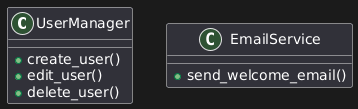

2. **Refactoriza**: Toma un fragmento de código que viole el SRP y sepáralo en varias clases o funciones.

In [ ]:
class Calculator:
    def calculate(self, a, b, operation):
        if operation == 'add':
            return a + b
        elif operation == 'subtract':
            return a - b
        elif operation == 'multiply':
            return a * b
        elif operation == 'divide':
            if b == 0:
                raise ValueError("Cannot divide by zero")
            return a / b
        else:
            raise ValueError("Unknown operation")

calculator = Calculator();
print(calculator.calculate(10, 5, 'add'))

# Dividir en métodos específicos para cada operación
# Cada método realiza una única tarea
class Calculator:
    def add(self, a, b):
        return a + b

    def subtract(self, a, b):
        return a - b

    def multiply(self, a, b):
        return a * b

    def divide(self, a, b):
        if b == 0:
            raise ValueError("Cannot divide by zero")
        return a / b

calculator = Calculator();
print(calculator.add(10, 5))

15
15


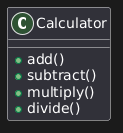

3. **Pregunta de reflexión**: ¿Qué problemas pueden surgir si una clase tiene más de una responsabilidad?

- Dificultad para mantener el código: Si una clase tiene múltiples responsabilidades, cualquier cambio en una de ellas puede afectar a las demás, lo que dificulta la tarea de mantenimiento.
- Pruebas complicadas: Las pruebas unitarias se vuelven más complejas, ya que es necesario probar todas las responsabilidades de la clase en lugar de una sola.
- Reutilización limitada: Una clase con múltiples responsabilidades es menos reutilizable, ya que no se puede utilizar una parte de su funcionalidad sin llevar consigo las demás.
- Acoplamiento fuerte: Las clases con múltiples responsabilidades tienden a estar más acopladas, lo que dificulta la modificación o sustitución de una parte del sistema sin afectar a otras partes.

## Autoevaluación
1. ¿Puedo identificar fácilmente la responsabilidad principal de cada clase en mi código?

Sí, si sigues el principio de responsabilidad única, cada clase debe tener una única responsabilidad bien definida, lo que facilita su identificación y comprensión.

2. ¿Qué ventajas aporta el SRP al mantenimiento de proyectos grandes?

- Facilita la comprensión del código: Al tener clases con responsabilidades claras y únicas, es más fácil para los desarrolladores entender qué hace cada parte del sistema.
- Mejora la mantenibilidad: Los cambios en una responsabilidad específica no afectan a otras partes del sistema, lo que reduce el riesgo de introducir errores.
- Facilita las pruebas unitarias: Las clases con una única responsabilidad son más fáciles de probar de manera aislada.
- Fomenta la reutilización: Las clases con responsabilidades específicas pueden ser reutilizadas en diferentes contextos sin llevar consigo funcionalidades innecesarias.

## Referencias y recursos
- [SOLID Principles en Python – Real Python](https://realpython.com/solid-principles-python/)
- [Single Responsibility Principle – Wikipedia](https://en.wikipedia.org/wiki/Single-responsibility_principle)
- [Clean Code de Robert C. Martin](https://www.oreilly.com/library/view/clean-code/9780136083238/)